<a href="https://colab.research.google.com/github/dharvi120/numpy-100/blob/master/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import zipfile
from google.colab import files

# 1. Upload ZIP from your computer
uploaded = files.upload()  # Select GlobalLandTemperaturesByCity.csv.zip from your system

# 2. Extract CSV
with zipfile.ZipFile("GlobalLandTemperaturesByCity.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()

# 3. Read CSV
df = pd.read_csv("GlobalLandTemperaturesByCity.csv")

# 4. Filter for India
country = "India"
df_country = df[df['Country'] == country].copy()

# 5. Convert date to datetime
df_country['dt'] = pd.to_datetime(df_country['dt'])

# 6. Filter for required years (2005–2015)
df_country = df_country[(df_country['dt'].dt.year >= 2005) & (df_country['dt'].dt.year <= 2015)]
df_country.head()



Saving GlobalLandTemperaturesByCity.csv.zip to GlobalLandTemperaturesByCity.csv.zip


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
52146,2005-01-01,12.483,0.337,Abohar,India,29.74N,73.85E
52147,2005-02-01,15.397,0.255,Abohar,India,29.74N,73.85E
52148,2005-03-01,22.672,0.201,Abohar,India,29.74N,73.85E
52149,2005-04-01,27.968,0.332,Abohar,India,29.74N,73.85E
52150,2005-05-01,31.951,0.948,Abohar,India,29.74N,73.85E


In [ ]:
# Separate 2015 data
df_2015 = df_country[df_country['dt'].dt.year == 2015]
df_hist = df_country[(df_country['dt'].dt.year >= 2005) & (df_country['dt'].dt.year <= 2014)]

# Group by month-day and find max/min
df_hist['month_day'] = df_hist['dt'].dt.strftime('%m-%d')
highs = df_hist.groupby('month_day')['AverageTemperature'].max()
lows = df_hist.groupby('month_day')['AverageTemperature'].min()


In [ ]:
# Align indexes before comparison
high_2015 = df_2015.groupby('month_day')['AverageTemperature'].max()
low_2015 = df_2015.groupby('month_day')['AverageTemperature'].min()

# Reset index alignment
record_high_days = high_2015[high_2015 > highs.reindex(high_2015.index)]
record_low_days = low_2015[low_2015 < lows.reindex(low_2015.index)]


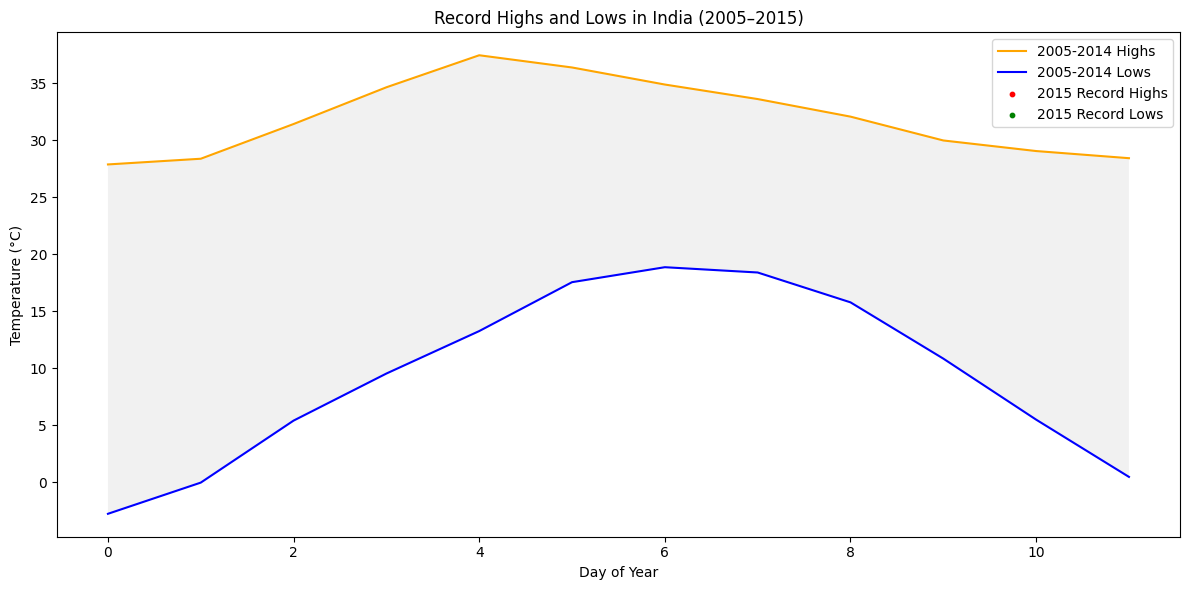

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot historical highs and lows
plt.plot(highs.values, color='orange', label='2005-2014 Highs')
plt.plot(lows.values, color='blue', label='2005-2014 Lows')

# Shade between highs and lows
plt.fill_between(range(len(highs)), lows.values, highs.values, facecolor='lightgray', alpha=0.3)

# Scatter for 2015 record highs/lows
plt.scatter(record_high_days.index.map(lambda x: list(highs.index).index(x)), record_high_days.values, color='red', s=10, label='2015 Record Highs')
plt.scatter(record_low_days.index.map(lambda x: list(lows.index).index(x)), record_low_days.values, color='green', s=10, label='2015 Record Lows')

# Formatting
plt.title(f"Record Highs and Lows in {country} (2005–2015)")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()


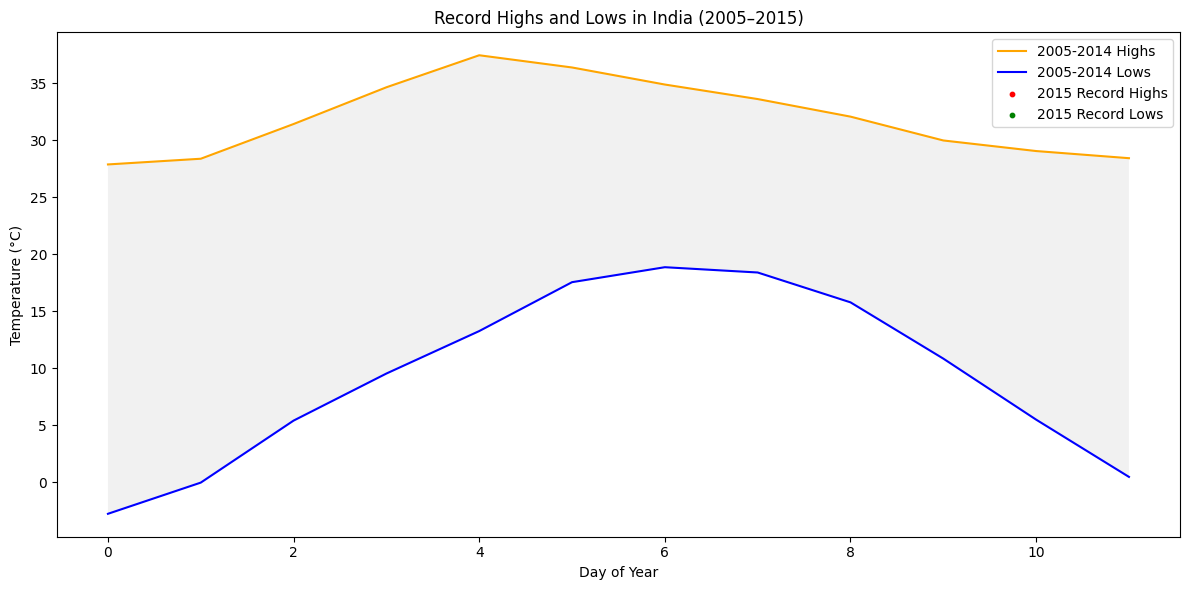

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot historical highs and lows
plt.plot(highs.values, color='orange', label='2005-2014 Highs')
plt.plot(lows.values, color='blue', label='2005-2014 Lows')

# Shade between highs and lows
plt.fill_between(range(len(highs)), lows.values, highs.values, facecolor='lightgray', alpha=0.3)

# Scatter for 2015 record highs/lows
plt.scatter(record_high_days.index.map(lambda x: list(highs.index).index(x)), record_high_days.values, color='red', s=10, label='2015 Record Highs')
plt.scatter(record_low_days.index.map(lambda x: list(lows.index).index(x)), record_low_days.values, color='green', s=10, label='2015 Record Lows')

# Formatting
plt.title(f"Record Highs and Lows in {country} (2005–2015)")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

display(plt.gcf())